<a href="https://colab.research.google.com/github/Kenfinn/AIMastery_Orbit/blob/main/Quiz_1_Week_4_Afinzaki_Amiral_mencari_insight_dengan_pendekatan_statistik_deskriptif_maupun_inferensial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quiz 1 - Week 4

Agrikultur merupakan salah satu sektor penting untuk menunjang ekonomi dalam negeri maupun luar negeri. Oleh karena nya kualitas produk dan jumlah produksi harus tetapi stabil.

Apa insight yang bisa kamu explore dari data-data diatas menggunakan pendekatan statistik deskriptif maupun inferensial?
Insight bisa dalam bentuk angka

*   Insight bisa dalam bentuk graph
*   Insight bisa dalam bentuk tabel
*   Insight bisa dalam bentuk estimasi
*   Insight bisa dalam bentuk hipotesis

Contoh Insight
*   Total produksi berdasarakan jenis tanaman
*   Total produksi setiap tahunnya
*   Jumlah produksi tertinggi dan terendah berdasarkan daerah 


disini memasukan library yang di butuhkan 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import data ke drive dan di mount 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


manggil dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/apy.csv")

cetak dataset

In [20]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899


memberikan informasi mengenai tipe data dan data yang tidak kosong

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


disini saya ingin mengetahui banyak nya value pada setiap colom 

In [28]:
data.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38442
Production       51628
dtype: int64

disini saya melihat banyaknya uniqe di setiap kolom 

In [35]:
print (data['State_Name'].unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [22]:
print (data['District_Name'].unique())

['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP'
 'KAMRUP METRO' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MARIGAON' 'NAGAON' 'NALBARI' 'SIVASAGAR' 'SONITPUR' 'TINSUKIA'
 'UDALGURI' 'ARARIA' 'ARWAL' 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR'
 'BHOJPUR' 'BUXAR' 'DARBHANGA' 'GAYA' 'GOPALGANJ' 'JAMUI' 'JEHANABAD'
 'KAIMUR (BHABUA)' 'KATIHAR' 'KHAGARIA' 'KISHANGANJ' 'LAKHISARAI'
 'MADHEPURA' 'MADHUBANI' 'MUNGER' 'MU

In [7]:
print (data['Season'].unique())

['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


In [21]:
print (data['Crop'].unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [31]:
cat = ['Season', 'Crop_Year','State_Name' ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


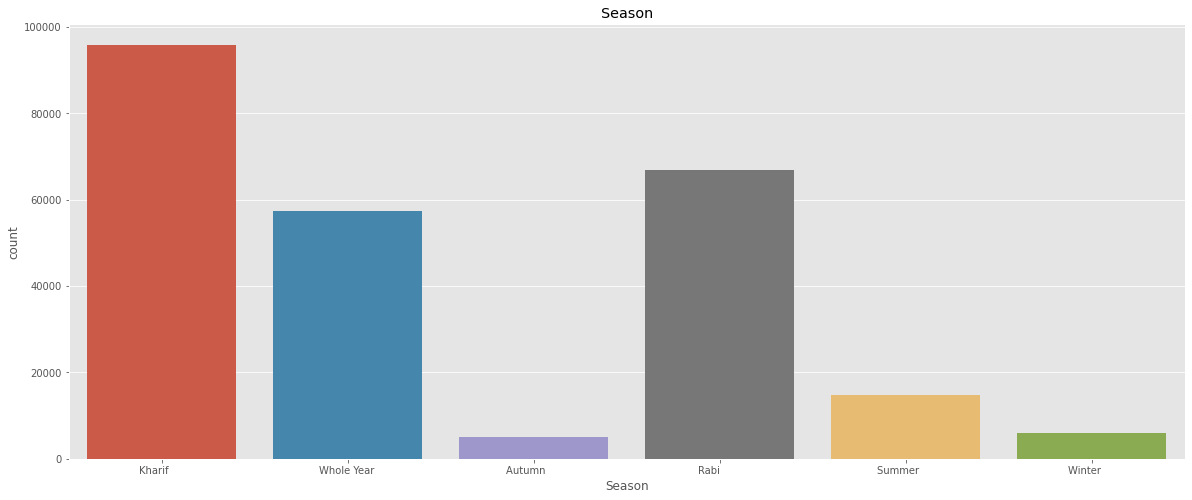

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


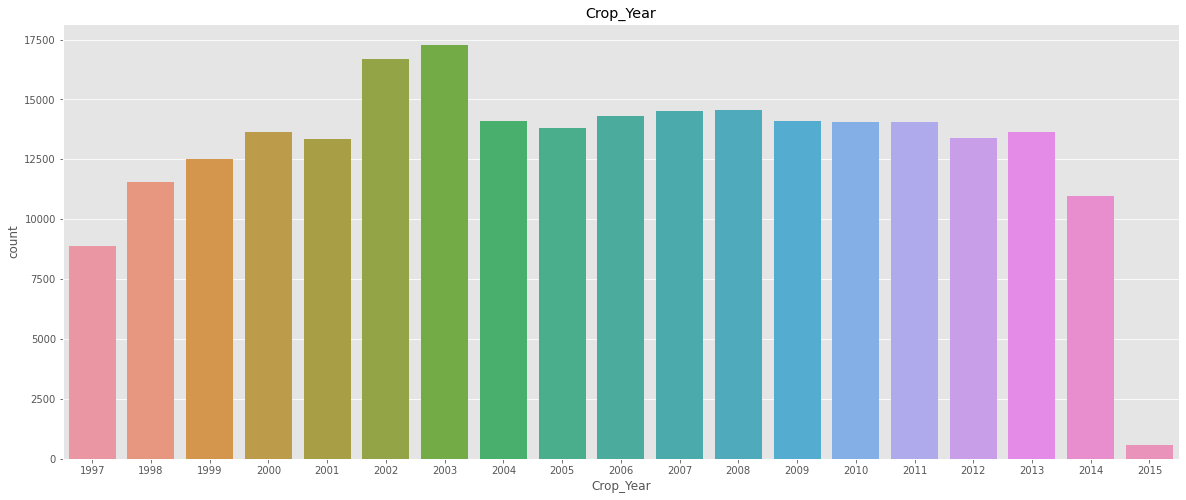

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


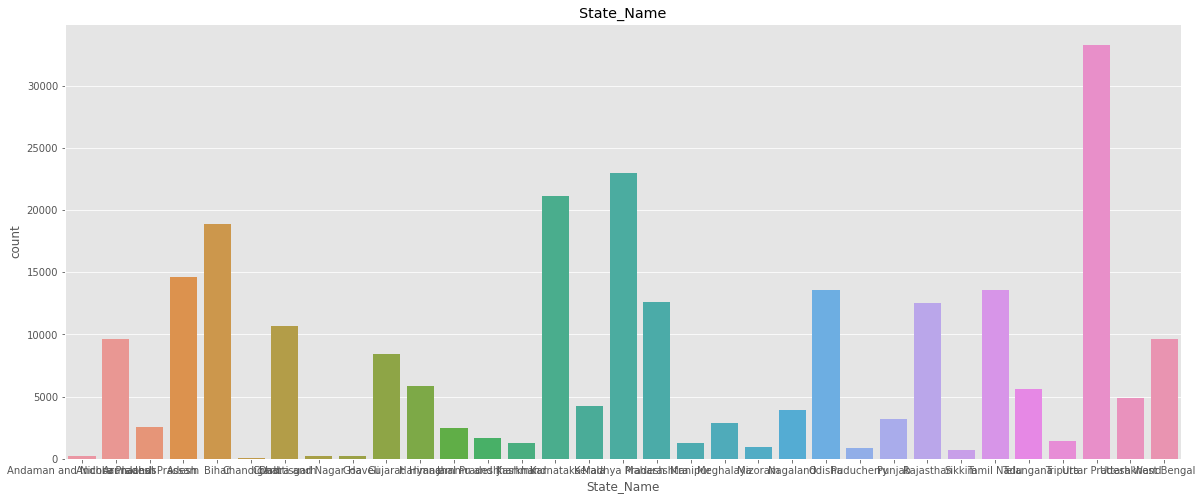

In [32]:
for column in cat:
  plt.figure(figsize=(20,8))
  plt.title(f"{column}")
  sns.countplot(data[column])
  plt.show()

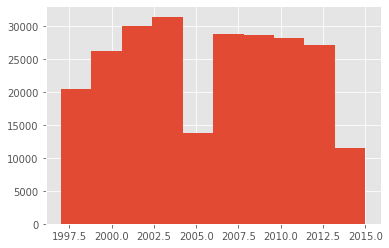

In [12]:
distric = data['Crop_Year']
plt.hist(distric, bins=10)
plt.show()

In [13]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

<Figure size 720x432 with 0 Axes>

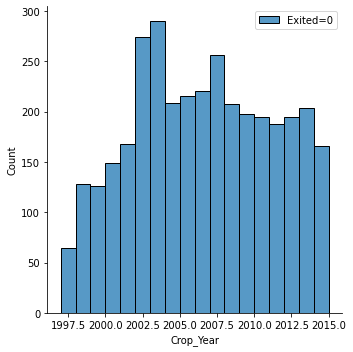

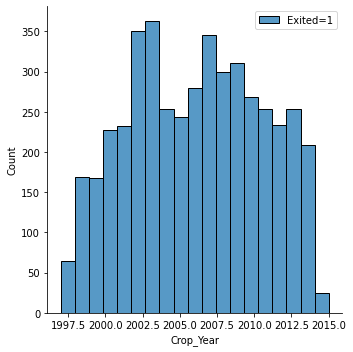

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data['Crop_Year'][data['Area']==0])
plt.legend(['Exited=0'])
plt.show()
sns.displot(data['Crop_Year'][data['Area']==1])
plt.legend(['Exited=1'])
plt.show()

In [ ]:
# pivot = pd.crosstab(data['Season'], data['Crop'], margins=True)
pivot = pd.pivot_table(data, index=['Season', 'Crop'])
pivot

Area    Crop_Year
Season      Crop                                  
Autumn      Arhar/Tur     1423.388889  1997.000000
            Banana         213.333333  1998.000000
            Cotton(lint)    30.000000  1998.000000
            Dry chillies   898.463415  2000.195122
            Dry ginger      60.000000  1998.000000
...                               ...          ...
Winter      Sunflower        5.000000  1998.500000
            Sweet potato    10.000000  1998.000000
            Turmeric        20.000000  1998.000000
            Urad          2927.415648  2007.682152
            Wheat          530.294118  2006.000000

[339 rows x 2 columns]

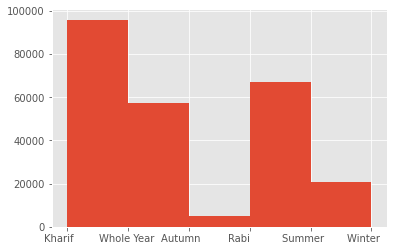

In [14]:
age = data['Season']
plt.hist(age, bins=5)
plt.show()

In [30]:
sns.barplot(data['State_Name'], data['Season'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored